# A Short Pandas Tutorial

[Kevin McGuinness](http://www.eeng.dcu.ie/~mcguinne/), School of Electronic Engineering, Dublin City University



This is a short tutorial on [pandas](http://pandas.pydata.org/), a Python library for data analysis. 

I'm only going to cover a small subset of what Pandas can do here. There are lots of other good tutorials online for those that are interested. You can find a good collection [here](https://pandas.pydata.org/pandas-docs/stable/tutorials.html).

This tutorial is going to focus on two areas that beginners often get tripped up on: selecting rows and columns, and grouping and aggregation. 

First we import pandas. It is a common pattern to rename the import to `pd`, just as it is to rename numpy to `np`.

In [ ]:
import pandas as pd
import numpy as np

We'll be working with the classic [titanic dataset](https://www.kaggle.com/c/titanic/data). The data is stored in CSV format. You can use the `read_csv` function to load data from a CSV file into a pandas `DataFrame` object. 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/jbryer/CompStats/master/Data/titanic3.csv')

The `DataFrame` object is the main object in pandas. It is essentially a collection of `Series` objects, one for each column, and and `Index`. We'll see what this means in a while. The first thing you usually want to do after you load a data frame is get a feel for what it contains.

## Previewing and summarizing the contents of a DataFrame

You can use the `head(n)` method to look at the first few rows in the data frame. This is useful for getting an idea of what the data looks like.

In [ ]:
df.head(3)

pclass  survived                            name     sex    age  sibsp  \
0       1         1   Allen, Miss. Elisabeth Walton  female  29.00      0   
1       1         1  Allison, Master. Hudson Trevor    male   0.92      1   
2       1         0    Allison, Miss. Helen Loraine  female   2.00      1   

   parch  ticket      fare    cabin embarked boat  body  \
0      0   24160  211.3375       B5        S    2   NaN   
1      2  113781  151.5500  C22 C26        S   11   NaN   
2      2  113781  151.5500  C22 C26        S  NaN   NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON

Similarily, the `tail(n)` method shows the last `n` rows.

In [ ]:
df.tail(3)

pclass  survived                       name   sex   age  sibsp  parch  \
1306       3         0  Zakarian, Mr. Mapriededer  male  26.5      0      0   
1307       3         0        Zakarian, Mr. Ortin  male  27.0      0      0   
1308       3         0         Zimmerman, Mr. Leo  male  29.0      0      0   

      ticket   fare cabin embarked boat   body home.dest  
1306    2656  7.225   NaN        C  NaN  304.0       NaN  
1307    2670  7.225   NaN        C  NaN    NaN       NaN  
1308  315082  7.875   NaN        S  NaN    NaN       NaN

The `describe()` method summarizes each of the numerical rows in the data frame. It's useful to get an initial idea of the statistics of the data.

In [ ]:
df.describe()

pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881138     0.498854     0.385027   
std       0.837836     0.486055    14.413493     1.041658     0.865560   
min       1.000000     0.000000     0.170000     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000

**Important:** You need to be careful with interpreting the results of `describe()`. It will by default treat all numerical attributes as if they were on a *ratio scale*. So if you have a nominal attribute encoded numerically, describe will compute statistics like the mean and standard deviation, which are meaningless for nominal variables! 

You can fix this behaviour by converting the relevant columns to the "category" data type (`dtype`). This is the data type used by pandas for nominal attributes.

The "survived" column in the data frame should be a boolean indicator of survival (i.e. nominal), but pandas is treating it as if it were a number. Let's fix this...

In [ ]:
df.survived.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [ ]:
df.survived = df.survived.astype('category')

In [ ]:
df.survived.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: category
Categories (2, int64): [0, 1]

Now the `describe()` method will ignore the "survived" column.

In [ ]:
df.describe()

pclass          age        sibsp        parch         fare  \
count  1309.000000  1046.000000  1309.000000  1309.000000  1308.000000   
mean      2.294882    29.881138     0.498854     0.385027    33.295479   
std       0.837836    14.413493     1.041658     0.865560    51.758668   
min       1.000000     0.170000     0.000000     0.000000     0.000000   
25%       2.000000    21.000000     0.000000     0.000000     7.895800   
50%       3.000000    28.000000     0.000000     0.000000    14.454200   
75%       3.000000    39.000000     1.000000     0.000000    31.275000   
max       3.000000    80.000000     8.000000     9.000000   512.329200   

             body  
count  121.000000  
mean   160.809917  
std     97.696922  
min      1.000000  
25%     72.000000  
50%    155.000000  
75%    256.000000  
max    328.000000

We can specifically request nominal stats on this column as follows:

In [ ]:
df.survived.describe()

count     1309
unique       2
top          0
freq       809
Name: survived, dtype: int64

## Indexing specific columns

Often the dataset will contain extra information that you do not need for your analysis. In this case, it is often useful to be able to extract a specific subset of the columns.

You can list the columns in the dataframe using the `columns` attribute

In [ ]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

There are two syntaxes supported for indexing individual columns. You can use the `.` operator and access them like they were attributes of the data frame as long as the column names have no spaces:

In [ ]:
df.survived.head(3)

0    1
1    1
2    0
Name: survived, dtype: category
Categories (2, int64): [0, 1]

Or you can use the subscript operator `[]` with the column name

In [ ]:
df['survived'].head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: category
Categories (2, int64): [0, 1]

Note that the data type returned by this is a pandas `Series` instead of a `DataFrame`. Indeed, DataFrames are really a collection of `Series` objects representing the columns, coupled with an `Index` object that identifies rows.

In [ ]:
print(type(df))
print(type(df.survived))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


## Indexing multiple columns

You can pass a list of column names to the subscript operator if you need to extract a subset of the columns in a data frame.

In [ ]:
df2 = df[['pclass', 'survived']]
df2.head(3)

pclass survived
0       1        1
1       1        1
2       1        0

Note the use of double brackets. This is because you are passing a list (which is delimited using brackets) to the subscript operator (also delimited by brackets).

The returned object is a `DataFrame` and not a `Series`.

In [ ]:
print(type(df2))

<class 'pandas.core.frame.DataFrame'>


To use column indices instead of column names, use ``iloc`` (index location)

In [ ]:
df.iloc[:, [0,1]].head(3)

pclass survived
0       1        1
1       1        1
2       1        0

This gives us a convenient way of extracting a range of columns using the builtin `range(a, b)` function, which returns a list of integers starting at `a` and ending at `b-1`.

In [ ]:
df.iloc[:, range(1,4)].head(3)

survived                            name     sex
0        1   Allen, Miss. Elisabeth Walton  female
1        1  Allison, Master. Hudson Trevor    male
2        0    Allison, Miss. Helen Loraine  female

## Indexing rows

Rows are indexed in pandas using the `loc` and `iloc` attributes. The `loc` attribute lets you index rows by *name* and the `iloc` attribute lets you index them by *index* (i.e. number).

Let's see how to index by number first. To extract the first row, use index zero.

In [ ]:
r0 = df.iloc[0]
print(r0)

pclass                                   1
survived                                 1
name         Allen, Miss. Elisabeth Walton
sex                                 female
age                                     29
sibsp                                    0
parch                                    0
ticket                               24160
fare                               211.338
cabin                                   B5
embarked                                 S
boat                                     2
body                                   NaN
home.dest                     St Louis, MO
Name: 0, dtype: object


In [ ]:
type(r0)

pandas.core.series.Series

You can use the standard python ":" syntax to index row ranges. Row ranges return a data frame. Here we extract rows 3 to 6.

In [ ]:
df.iloc[3:7]

pclass survived                                             name     sex  \
3       1        0             Allison, Mr. Hudson Joshua Creighton    male   
4       1        0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
5       1        1                              Anderson, Mr. Harry    male   
6       1        1                Andrews, Miss. Kornelia Theodosia  female   

    age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
3  30.0      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
5  48.0      0      0   19952   26.5500      E12        S    3    NaN   
6  63.0      1      0   13502   77.9583       D7        S   10    NaN   

                         home.dest  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON  
5                     New York, NY  
6                       Hudson, NY

In [ ]:
type(df.iloc[3:7])

pandas.core.frame.DataFrame

It is also possible to pass in a list of indices to extract non-sequential rows.

In [ ]:
df.iloc[[1,4,6]]

pclass survived                                             name     sex  \
1       1        1                   Allison, Master. Hudson Trevor    male   
4       1        0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
6       1        1                Andrews, Miss. Kornelia Theodosia  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat  body  \
1   0.92      1      2  113781  151.5500  C22 C26        S   11   NaN   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN   NaN   
6  63.00      1      0   13502   77.9583       D7        S   10   NaN   

                         home.dest  
1  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON  
6                       Hudson, NY

We need to look at the concept of a data frame **index** to understand indexing rows by name (I know there is a lot of terminology being overloaded here. Sorry about that). 

Every data frame has an **index** which provides a mechanism for indentifying rows in the data frame. Pandas will, by default, use a so called `RangeIndex` if none is specified when creating the data frame. The `RangeIndex` is just a numerical index that behaves similar to the numbers used to index rows with `iloc`.

In [ ]:
df.index

RangeIndex(start=0, stop=1309, step=1)

For data frames with this kind of index, `iloc` and `loc` behave the similarily.

In [ ]:
df.loc[[1,2]]

pclass survived                            name     sex   age  sibsp  \
1       1        1  Allison, Master. Hudson Trevor    male  0.92      1   
2       1        0    Allison, Miss. Helen Loraine  female  2.00      1   

   parch  ticket    fare    cabin embarked boat  body  \
1      2  113781  151.55  C22 C26        S   11   NaN   
2      2  113781  151.55  C22 C26        S  NaN   NaN   

                         home.dest  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON

In [ ]:
df.iloc[[1,2]]

pclass survived                            name     sex   age  sibsp  \
1       1        1  Allison, Master. Hudson Trevor    male  0.92      1   
2       1        0    Allison, Miss. Helen Loraine  female  2.00      1   

   parch  ticket    fare    cabin embarked boat  body  \
1      2  113781  151.55  C22 C26        S   11   NaN   
2      2  113781  151.55  C22 C26        S  NaN   NaN   

                         home.dest  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON

Be careful, however. `loc` includes the second endpoint when indexing using the slice notation!

In [ ]:
df.loc[:2]

pclass survived                            name     sex    age  sibsp  \
0       1        1   Allen, Miss. Elisabeth Walton  female  29.00      0   
1       1        1  Allison, Master. Hudson Trevor    male   0.92      1   
2       1        0    Allison, Miss. Helen Loraine  female   2.00      1   

   parch  ticket      fare    cabin embarked boat  body  \
0      0   24160  211.3375       B5        S    2   NaN   
1      2  113781  151.5500  C22 C26        S   11   NaN   
2      2  113781  151.5500  C22 C26        S  NaN   NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON

To illustrate the difference between `loc` and `iloc` we need a dataset with a different type of index column. Here we create a dataframe using a subset of the original columns and indexed by name.

In [ ]:
df2 = df[['sex', 'age', 'survived']]
df2.index = pd.Index(df['name'])

In [ ]:
df2.head(3)

sex    age survived
name                                                  
Allen, Miss. Elisabeth Walton   female  29.00        1
Allison, Master. Hudson Trevor    male   0.92        1
Allison, Miss. Helen Loraine    female   2.00        0

`iloc` indexes by row number, as before:

In [ ]:
df2.iloc[:5]

sex    age survived
name                                                                   
Allen, Miss. Elisabeth Walton                    female  29.00        1
Allison, Master. Hudson Trevor                     male   0.92        1
Allison, Miss. Helen Loraine                     female   2.00        0
Allison, Mr. Hudson Joshua Creighton               male  30.00        0
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.00        0

But `loc` indexes by the name in the index column.

In [ ]:
df2.loc['Allison, Miss. Helen Loraine']

sex         female
age              2
survived         0
Name: Allison, Miss. Helen Loraine, dtype: object

You can also use the slice operator to extract sections starting and ending with the given names.

In [ ]:
df2.loc['Allison, Miss. Helen Loraine': 'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)']

sex   age survived
name                                                                  
Allison, Miss. Helen Loraine                     female   2.0        0
Allison, Mr. Hudson Joshua Creighton               male  30.0        0
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0        0

## Indexing rows and columns simultaneously

Just combine the row indexing and column indexing approaches from above!

In [ ]:
df.iloc[:10][['name', 'sex', 'age']]

name     sex    age
0                    Allen, Miss. Elisabeth Walton  female  29.00
1                   Allison, Master. Hudson Trevor    male   0.92
2                     Allison, Miss. Helen Loraine  female   2.00
3             Allison, Mr. Hudson Joshua Creighton    male  30.00
4  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.00
5                              Anderson, Mr. Harry    male  48.00
6                Andrews, Miss. Kornelia Theodosia  female  63.00
7                           Andrews, Mr. Thomas Jr    male  39.00
8    Appleton, Mrs. Edward Dale (Charlotte Lamson)  female  53.00
9                          Artagaveytia, Mr. Ramon    male  71.00

In [ ]:
df[['name', 'sex', 'age']].iloc[:10]

name     sex    age
0                    Allen, Miss. Elisabeth Walton  female  29.00
1                   Allison, Master. Hudson Trevor    male   0.92
2                     Allison, Miss. Helen Loraine  female   2.00
3             Allison, Mr. Hudson Joshua Creighton    male  30.00
4  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.00
5                              Anderson, Mr. Harry    male  48.00
6                Andrews, Miss. Kornelia Theodosia  female  63.00
7                           Andrews, Mr. Thomas Jr    male  39.00
8    Appleton, Mrs. Edward Dale (Charlotte Lamson)  female  53.00
9                          Artagaveytia, Mr. Ramon    male  71.00

## Conditional selection of rows

A common operation in analysis is to select some subset of the rows in the dataset based on some condition (i.e. to filter the rows). This can be done using `.loc` by passing in a **boolean array** that is true for the rows you want to select.

Usually, you won't want to create this boolean array by hand, but will use another attribute to generate it. For example, suppose we want to select all rows from the dataframe where the person is female. We can first create a boolean array to select these elements as follows:

In [ ]:
selector = (df.sex == 'female')

In [ ]:
selector.head()

0     True
1    False
2     True
3    False
4     True
Name: sex, dtype: bool

We can then use this selector to index the rows we want.

In [ ]:
df_female = df.loc[selector]

In [ ]:
df_female.head(3)

pclass survived                                             name     sex  \
0       1        1                    Allen, Miss. Elisabeth Walton  female   
2       1        0                     Allison, Miss. Helen Loraine  female   
4       1        0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

    age  sibsp  parch  ticket      fare    cabin embarked boat  body  \
0  29.0      0      0   24160  211.3375       B5        S    2   NaN   
2   2.0      1      2  113781  151.5500  C22 C26        S  NaN   NaN   
4  25.0      1      2  113781  151.5500  C22 C26        S  NaN   NaN   

                         home.dest  
0                     St Louis, MO  
2  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

The two operations can be combined for a more succinct syntax

In [ ]:
df_female = df.loc[df.sex == 'female']

Let's look at a practical example. Suppose we wanted to find the percentage of females that survived and compare that to the percentage of males that survived. This could be achieved as follows:

In [ ]:
# select out the males and females
females = df.loc[df.sex == 'female']
males = df.loc[df.sex == 'male']

# calculate proportion of survivors
p_survival_female = (females.survived == 1).mean()
p_survival_male = (males.survived == 1).mean()

# print the results
print('males survived: {:.2f}%  females survived: {:.2f}%'.format(p_survival_male*100, p_survival_female*100))

males survived: 19.10%  females survived: 72.75%


We've used a little trick here to compute the proportions. The expression `(females.survived == 1)` evaluates to a boolean array that contains the value `True` if the column `survived == 1`. In Python, `True` can be coerced to `1` and `False` can be coerced to `0`. So by computing the mean over the boolean array , we are actually adding up the number of times we see a `1` and dividing by the total number of elements in the array. This is exactly the proportion that survived!

## Grouping and aggregation

The above example of grouping by some category and calculating some statistics on each category is such a common pattern that there's a built in mechanism in pandas for accomplishing it called `groupby` and `agg`. The idea is that you first group your data base on some nominal value, and then compute some summary statistics on the resulting groups (aggregation).

The `groupby` method takes a list of columns to group on and returnes a special `DataFrameGroupBy` object that is containing the groups. This object has an `agg` method which can be used for aggregation. The `agg` method takes a dictionary mapping column names to aggregation functions which are called on each of the groups.

Let's see how we could accomplish the previous male/female survival rate analysis with grouping and aggregation

In [ ]:
df.groupby(['sex']).agg({
    'survived': lambda x: (x == 1).mean()
})

survived
sex             
female  0.727468
male    0.190985

Note that in the above, we couldn't simply call `x.mean()` since the survived column is a nominal value, and it doesn't make sense to average nominal values. We could remedy this by converting it to a boolean attribute, after which it does make sense to average.

In [ ]:
df.survived = df.survived.astype(np.bool)

In [ ]:
df.groupby(['sex']).agg({
    'survived': np.mean
})

survived
sex             
female  0.727468
male    0.190985

There is a shortcut for common functions like mean/median/prod/sum/std/var: You can just specify them by name:

In [ ]:
df.groupby(['sex']).agg({'survived': 'mean'})

survived
sex             
female  0.727468
male    0.190985

Let's look at some more examples. Here we look at survival rate by class:

In [ ]:
df.groupby(['pclass']).agg({'survived': 'mean'})

survived
pclass          
1       0.619195
2       0.429603
3       0.255289

Unsurprisingly, upper-class passengers were more likely to survive than lower-class passengers.

We can combine the analysis and group by both class and gender:

In [ ]:
df.groupby(['pclass', 'sex']).agg({'survived': 'mean'})

survived
pclass sex             
1      female  0.965278
       male    0.340782
2      female  0.886792
       male    0.146199
3      female  0.490741
       male    0.152130

You can use a list if you need to compute multiple statistics on a single column. Here we compute the mean and standard deviation.

In [ ]:
df.groupby(['pclass', 'sex']).agg({'survived': ['mean', 'std']})

survived          
                   mean       std
pclass sex                       
1      female  0.965278  0.183714
       male    0.340782  0.475302
2      female  0.886792  0.318352
       male    0.146199  0.354343
3      female  0.490741  0.501076
       male    0.152130  0.359511

Here we analyze fares conditioned on class, computing the mean, standard deviation, and maximum fares.

In [ ]:
df.groupby(['pclass']).agg({'fare': ['mean', 'std', 'max']})

fare                     
             mean        std       max
pclass                                
1       87.508992  80.447178  512.3292
2       21.179196  13.607122   73.5000
3       13.302889  11.494358   69.5500

## Plotting

Pandas also integrates nicely with the [seaborn](http://seaborn.pydata.org/) statistics data visualization library.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Here we show how to compute a boxplot of the distribution of fares conditioned on class

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


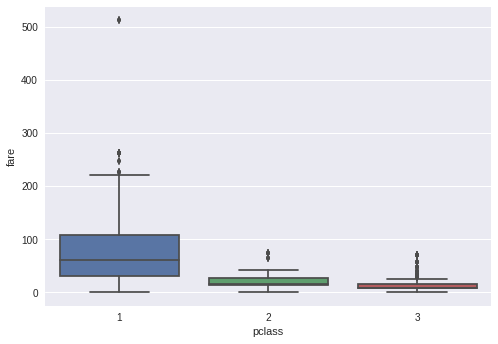

In [ ]:
sns.boxplot(x='pclass', y='fare', data=df)

The same data, but in a violin plot:

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


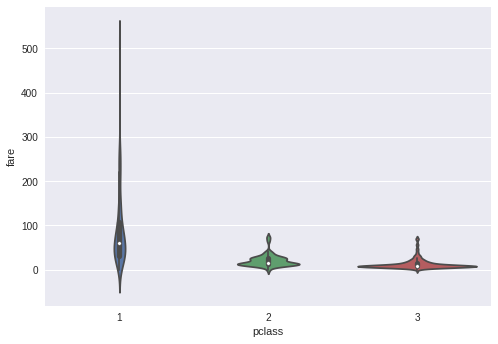

In [ ]:
sns.violinplot(x='pclass', y='fare', data=df)

## Converting to/from numpy arrays

Another common operation with pandas is to convert to and from numpy arrays. This can be accomplished using the `as_matrix()` method. You can call this on entire `DataFrame` objects or on individual `Series` objects (columns)

Calling `as_matrix()` on the full data frame is usually not that useful if it contains lots of different data types, since all types will be coerced to `object`. Numpy works best on homogenous data types.

In [ ]:
m = df.as_matrix()

In [ ]:
m

array([[1, True, 'Allen, Miss. Elisabeth Walton', ..., '2', nan,
        'St Louis, MO'],
       [1, True, 'Allison, Master. Hudson Trevor', ..., '11', nan,
        'Montreal, PQ / Chesterville, ON'],
       [1, False, 'Allison, Miss. Helen Loraine', ..., nan, nan,
        'Montreal, PQ / Chesterville, ON'],
       ...,
       [3, False, 'Zakarian, Mr. Mapriededer', ..., nan, 304.0, nan],
       [3, False, 'Zakarian, Mr. Ortin', ..., nan, nan, nan],
       [3, False, 'Zimmerman, Mr. Leo', ..., nan, nan, nan]], dtype=object)

In [ ]:
m.dtype

dtype('O')

In [ ]:
df.fare.as_matrix()

array([211.3375, 151.55  , 151.55  , ...,   7.225 ,   7.225 ,   7.875 ])